# Notebook for learning from data coursework 2022

In [58]:
# import our libraries that we will be using to investigate the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

## load out csv data into a pandas dataframe so that we can manipulate it

In [59]:
dataframe = pd.read_csv("AT_T_SBC_Stock_Price_Data_2000_2020.csv")

# filter out the columns we dont care about
dataframe["LIQ"] = dataframe["ASKHI"] - dataframe["BIDLO"]
important_cols = ["DATE", "OPENPRC", "VOL", "BIDLO", "ASKHI", "PRC", "LIQ"]
dataframe = dataframe[important_cols]


In [60]:
def gen_model(model, data, cols, time_series_past, time_series_future, polynomial=0, show_plot=False):
    
    data = data.copy()

    #col_selection = cols_to_include.copy()
    col_selection = ["DATE"]
    for i in range(1, time_series_past):
        for col in cols:
            data[col + str(i) + "DAY"] = data[col].shift(periods=i)
            col_selection.append(col + str(i) + "DAY")

    data["PRC" + str(time_series_future) + "DAY"] = data["PRC"].shift(-time_series_future)

    if time_series_future == 0:
        cleaned_data = data.iloc[time_series_past:]
    else:
        cleaned_data = data.iloc[time_series_past:-time_series_future]

    if not polynomial == 0:
        poly = PolynomialFeatures(degree=polynomial, include_bias=False)
        poly.fit_transform(cleaned_data[cols])
        features = poly.transform(cleaned_data[cols])
        headers = poly.get_feature_names(cleaned_data[cols])
        X = features
    else:
        X = cleaned_data[col_selection]
    if time_series_future == 0:
        Y = cleaned_data["PRC"]
    else:
        Y = cleaned_data["PRC" + str(time_series_future) + "DAY"]

    #x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    #model.fit(x_train, y_train)

    # predict our testing data
    #predictions = model.predict(x_test)
    predictions = cross_val_predict(model, X, Y)
    print(len(predictions))

    total_error = 0

    # itterate our predictions and calculate the mean square error
    for i in range(len(predictions) - 1):
        total_error += pow(predictions[i] - Y.array[i], 2)

    if show_plot:
        print("number of predictions:", len(Y))

        if polynomial == 0:
            plt.plot(X["DATE"], predictions, "bo", markersize=0.3)
            plt.plot(X["DATE"], Y, "ro", markersize=0.3)
        else:
            plt.plot(X.transpose()[0], predictions, "bo", markersize=0.3)
            plt.plot(X.transpose()[0], Y, "ro", markersize=0.3)
        plt.title(str(model) + " predicting " + str(time_series_future) + " days into the future")
        plt.show()

    # check our mean square error for our models
    MSE = total_error / len(Y)
    print("total error squared: ", total_error, "MSE:", MSE)

    cross_val_linear = cross_val_score(model, X, Y)
    print("cross validation score:", cross_val_linear)

    return MSE

## take a look at the results when we include all the important data

In [61]:
linear_all_props = gen_model(LinearRegression(), dataframe, important_cols, time_series_past=5, time_series_future=0)
lasso_all_props = gen_model(Lasso(max_iter=3000), dataframe, important_cols, time_series_past=5, time_series_future=0)
ridge_all_props = gen_model(Ridge(max_iter=3000), dataframe, important_cols, time_series_past=5, time_series_future=0)

5282
total error squared:  1655.843987872449 MSE: 0.31348807040371995
cross validation score: [0.99209734 0.996042   0.97715208 0.9811265  0.98390535]
5282
total error squared:  2114.4619297524473 MSE: 0.4003146402409026
cross validation score: [0.98867038 0.99491149 0.97466178 0.97936428 0.98365172]
5282
total error squared:  1655.722753864296 MSE: 0.3134651181113775
cross validation score: [0.99209815 0.99604211 0.97715268 0.98112851 0.98390598]


/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.25591e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.36042e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.5099e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.16217e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear

## check if reducing the amount of data will change our prediction quality

In [62]:
cols_to_include = ["PRC", "VOL", "LIQ"]
linear_selected_props = gen_model(LinearRegression(), dataframe, cols_to_include, time_series_past=5, time_series_future=0)
lasso_selected_props = gen_model(Lasso(max_iter=3000), dataframe, cols_to_include, time_series_past=5, time_series_future=0)
ridge_selected_props = gen_model(Ridge(max_iter=3000), dataframe, cols_to_include, time_series_past=5, time_series_future=0)

5282
total error squared:  1660.1024169742782 MSE: 0.31429428568236994
cross validation score: [0.99208827 0.99608418 0.97688807 0.98119053 0.98373387]
5282
total error squared:  2166.535951829667 MSE: 0.4101734100396946
cross validation score: [0.98820086 0.9948172  0.97457345 0.97975279 0.98370015]
5282
total error squared:  1660.1748822391332 MSE: 0.3143080049676511
cross validation score: [0.99208702 0.9960841  0.97689021 0.98119086 0.98373618]


/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.66145e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.29583e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.19212e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.64547e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linea

## selected columns with regularisation

In [63]:
linear_selected_props_normal = gen_model(LinearRegression(), dataframe, important_cols, time_series_past=5, time_series_future=10)
lasso_selected_props_normal = gen_model(Lasso(max_iter=3000, normalize=True), dataframe, important_cols, time_series_past=5, time_series_future=10)
ridge_selected_props_normal = gen_model(Ridge(max_iter=3000, normalize=True), dataframe, important_cols, time_series_past=5, time_series_future=10)

5272
total error squared:  14019.365393140282 MSE: 2.659211948622967
cross validation score: [0.93436674 0.96403149 0.82684457 0.82719479 0.85465384]
5272
total error squared:  253064.75764736228 MSE: 48.00166116224626
cross validation score: [-0.07668316 -0.1799334  -3.32858484 -2.05422081 -0.25033852]
5272
total error squared:  16630.688673652257 MSE: 3.154531235518258
cross validation score: [0.92190217 0.95366804 0.79181306 0.78547501 0.84348895]


## can we predict more into the future than one day?

In [64]:
# 10 days into the future
linear_10_days_all = gen_model(LinearRegression(), dataframe, important_cols, time_series_past=5, time_series_future=10)
lasso_10_days_all = gen_model(Lasso(max_iter=3000), dataframe, important_cols, time_series_past=5, time_series_future=10)
ridge_10_days_all = gen_model(Ridge(max_iter=3000), dataframe, important_cols, time_series_past=5, time_series_future=10)

linear_10_days = gen_model(LinearRegression(), dataframe, cols_to_include, time_series_past=5, time_series_future=10)
lasso_10_days = gen_model(Lasso(max_iter=3000), dataframe, cols_to_include, time_series_past=5, time_series_future=10)
ridge_10_days = gen_model(Ridge(max_iter=3000), dataframe, cols_to_include, time_series_past=5, time_series_future=10)

linear_10_days_normal = gen_model(LinearRegression(normalize=True), dataframe, cols_to_include, time_series_past=5, time_series_future=10)
lasso_10_days_normal = gen_model(Lasso(max_iter=3000, normalize=True), dataframe, cols_to_include, time_series_past=5, time_series_future=10)
ridge_10_days_normal = gen_model(Ridge(max_iter=3000, normalize=True), dataframe, cols_to_include, time_series_past=5, time_series_future=10)

5272
total error squared:  14019.365393140282 MSE: 2.659211948622967
cross validation score: [0.93436674 0.96403149 0.82684457 0.82719479 0.85465384]
5272
total error squared:  14647.129559774792 MSE: 2.7782870940392246
cross validation score: [0.92993753 0.96190646 0.82166076 0.82201095 0.85620994]
5272
total error squared:  14018.592890553364 MSE: 2.6590654193007137
cross validation score: [0.93436861 0.96403326 0.8268444  0.82718968 0.85468354]
5272
total error squared:  14038.2128671112 MSE: 2.6627869626538696
cross validation score: [0.93414167 0.96340385 0.82326372 0.82702264 0.85863236]


/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.2862e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.38898e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.54445e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.1895e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_

5272
total error squared:  14647.28043364231 MSE: 2.778315711995886
cross validation score: [0.92999321 0.96149008 0.81959307 0.82158497 0.85826133]
5272
total error squared:  14037.93998276176 MSE: 2.6627352015860697
cross validation score: [0.93414436 0.9634034  0.82327052 0.82702196 0.85862906]
5272
total error squared:  14038.212865409065 MSE: 2.662786962331006
cross validation score: [0.93414167 0.96340385 0.82326372 0.82702264 0.85863236]
5272
total error squared:  253064.75764736228 MSE: 48.00166116224626
cross validation score: [-0.07668316 -0.1799334  -3.32858484 -2.05422081 -0.25033852]
5272


/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.69388e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.36912e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.26575e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.71984e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linea

total error squared:  28283.014029278147 MSE: 5.364759868982957
cross validation score: [0.87521086 0.90269961 0.58376466 0.56152927 0.7942873 ]


## investigate ridge regression

In [65]:
ridge_100_days = gen_model(Ridge(max_iter=3000), dataframe, cols_to_include, time_series_past=5, time_series_future=100)

5182
total error squared:  87116.57839014141 MSE: 16.81138139524149
cross validation score: [ 0.65377299  0.7288872  -0.1261972  -0.31732091  0.03834817]


/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.8313e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.54514e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.56969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.0646e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alex/.local/lib/python3.10/site-packages/sklearn/linear_

## using only the price of the previous dates

In [66]:
linear_100_days_5_past = gen_model(LinearRegression(normalize=True), dataframe, cols_to_include, time_series_past=5, time_series_future=100)
lasso_100_days_5_past = gen_model(Lasso(max_iter=3000), dataframe, cols_to_include, time_series_past=5, time_series_future=100)
ridge_100_days_5_past = gen_model(Ridge(max_iter=3000, normalize=True), dataframe, cols_to_include, time_series_past=5, time_series_future=100)
linear_100_days_14_past = gen_model(LinearRegression(normalize=True), dataframe, cols_to_include, time_series_past=14, time_series_future=100)
lasso_100_days_14_past = gen_model(Lasso(max_iter=3000), dataframe, cols_to_include, time_series_past=14, time_series_future=100)
ridge_100_days_14_past = gen_model(Ridge(max_iter=3000, normalize=True), dataframe, cols_to_include, time_series_past=14, time_series_future=100)

5182
total error squared:  87124.45488619094 MSE: 16.81290136746255
cross validation score: [ 0.65368416  0.72889645 -0.12617691 -0.31731315  0.03840628]
5182
total error squared:  86937.62334301729 MSE: 16.77684742242711
cross validation score: [ 0.67612611  0.71383598 -0.16492385 -0.35646722 -0.01261842]
5182
total error squared:  95321.43606060145 MSE: 18.394719425048525
cross validation score: [ 0.59678634  0.69065933 -0.31177378 -0.60387127  0.24086016]
5173
total error squared:  88166.17707956374 MSE: 17.043529302061422
cross validation score: [ 0.63897091  0.7229419  -0.1270621  -0.3014219   0.06745079]
5173
total error squared:  87504.11496985181 MSE: 16.91554513238968
cross validation score: [ 0.67736643  0.70183015 -0.1762795  -0.34092804 -0.0307004 ]
5173
total error squared:  88031.30438554498 MSE: 17.017456869426827
cross validation score: [ 0.63204996  0.71813236 -0.16899445 -0.34897906  0.1750824 ]


## mean squared error summary

In [67]:
print("Mean Squared Errors (Lower is better)")
print("column selection: ", cols_to_include)
print("Linear with all properties: ", linear_all_props)
print("Lasso with all properties: ", lasso_all_props)
print("Ridge with all properties: ", ridge_all_props)
print()
print("Linear with selected properties: ", linear_selected_props)
print("Lasso with selected properties: ", lasso_selected_props)
print("Ridge with selected properties: ", ridge_selected_props)
print()
print("Linear with selected properties normalized: ", linear_selected_props_normal)
print("Lasso with selected properties normalized: ", lasso_selected_props_normal)
print("Ridge with selected properties normalized: ", ridge_selected_props_normal)
print()
print("Linear with all properties 10 days: ", linear_10_days_all)
print("Lasso with all properties 10 days: ", lasso_10_days_all)
print("Ridge with all properties 10 days: ", ridge_10_days_all)
print("Linear with selected properties 10 days: ", linear_10_days)
print("Lasso with selected properties 10 days: ", lasso_10_days)
print("Ridge with selected properties 10 days: ", ridge_10_days)
print("Linear with selected properties 10 days normalized: ", linear_10_days_normal)
print("Lasso with selected properties 10 days normalized: ", lasso_10_days_normal)
print("Ridge with selected properties 10 days normalized: ", ridge_10_days_normal)
print()
print("Linear 100 days with 5 past days", linear_100_days_5_past)
print("Lasso 100 days with 5 past days", lasso_100_days_5_past)
print("Ridge 100 days with 5 past days", ridge_100_days_5_past)
print("Linear 100 days with 14 past days", linear_100_days_14_past)
print("Lasso 100 days with 14 past days", lasso_100_days_14_past)
print("Ridge 100 days with 14 past days", ridge_100_days_14_past)
print()

Mean Squared Errors (Lower is better)
column selection:  ['PRC', 'VOL', 'LIQ']
Linear with all properties:  0.31348807040371995
Lasso with all properties:  0.4003146402409026
Ridge with all properties:  0.3134651181113775

Linear with selected properties:  0.31429428568236994
Lasso with selected properties:  0.4101734100396946
Ridge with selected properties:  0.3143080049676511

Linear with selected properties normalized:  2.659211948622967
Lasso with selected properties normalized:  48.00166116224626
Ridge with selected properties normalized:  3.154531235518258

Linear with all properties 10 days:  2.659211948622967
Lasso with all properties 10 days:  2.7782870940392246
Ridge with all properties 10 days:  2.6590654193007137
Linear with selected properties 10 days:  2.6627869626538696
Lasso with selected properties 10 days:  2.778315711995886
Ridge with selected properties 10 days:  2.6627352015860697
Linear with selected properties 10 days normalized:  2.662786962331006
Lasso with sel

5272
total error squared:  326794.96460472763 MSE: 61.986905274037866
cross validation score: [-0.73085695 -0.22327635 -3.30604596 -2.21062568 -0.29316026]
5271
total error squared:  18398.89457947233 MSE: 3.4905889925009164
cross validation score: [0.91503338 0.95097669 0.7683093  0.76968371 0.81058318]
5270
total error squared:  18371.897811504274 MSE: 3.4861286169837333
cross validation score: [0.91516158 0.95120357 0.76701659 0.77024913 0.81116814]
5269
total error squared:  18333.771462855675 MSE: 3.4795542726998816
cross validation score: [0.9154482  0.95142546 0.76648461 0.76936802 0.81219662]
5268
total error squared:  18337.84177102155 MSE: 3.480987428060279
cross validation score: [0.9154833  0.95155774 0.76568794 0.76858673 0.81263151]
5267
total error squared:  18339.260319166242 MSE: 3.481917660749239
cross validation score: [0.9154823  0.95163608 0.76417957 0.76829739 0.81269205]
5266
total error squared:  18361.950199742663 MSE: 3.486887618637042
cross validation score: 

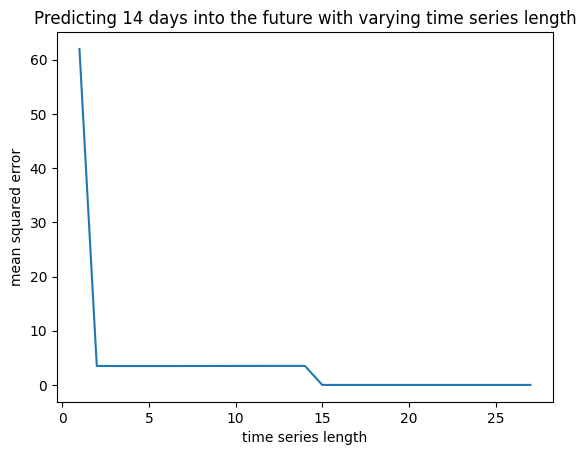

In [68]:
values = []
days = range(1,28)

for i in days:
    mse = gen_model(LinearRegression(normalize=True), dataframe, cols_to_include, time_series_past=i, time_series_future=14)
    values.append(mse)
print("done")
plt.plot(days, values)
print(values)
plt.xlabel("time series length")
plt.ylabel("mean squared error")
plt.title("Predicting 14 days into the future with varying time series length")
plt.show()